In [ ]:
# Install dependencies
! pip install ta
! pip install tensorflow
! pip install keras

In [1]:
# Libraries for Data Analysis
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from datetime import timedelta

# Machine learning Library
from sklearn.preprocessing import RobustScaler

# Library for Performing Technical Analysis
import ta

# Tensorflow 
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Loading the data
data_frame = pd.read_csv("TSLA.csv")

In [2]:
days_to_learn = int(input("Input the number of days to look back: "))
days_to_predict = int(input("Input the number of days to predict: "))

Input the number of days to look back: 20
Input the number of days to predict: 20


In [3]:
data_frame['Date'] = pd.to_datetime(data_frame.Date)
data_frame.set_index('Date', inplace=True)
data_frame.dropna(inplace=True)

data_frame = ta.add_all_ta_features(data_frame, open="Open", high="High", low="Low", close="Close", volume="Volume", fillna=True)

data_frame.drop(["Open", "High", "Low", "Adj Close", "Volume"], axis = 1, inplace = True)

data_frame = data_frame.tail(1000)

close_scaler = RobustScaler()

close_scaler.fit(data_frame[['Close']])

scaler = RobustScaler()

data_frame = pd.DataFrame(scaler.fit_transform(data_frame), columns = data_frame.columns, index = data_frame.index)

data_frame

C:\Users\AndrejsinD\Anaconda3\lib\site-packages\ta\trend.py:608: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i]/self._trs[i])
C:\Users\AndrejsinD\Anaconda3\lib\site-packages\ta\trend.py:612: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i]/self._trs[i])


,Close,volume_adi,volume_obv,volume_cmf,volume_fi,momentum_mfi,volume_em,volume_sma_em,volume_vpt,volume_nvi,...,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,others_dr,others_dlr,others_cr
Date,,,,,,,,,,,,,,,,,,,,,
2019-09-30,-0.772259,-1.339576,-1.197537,0.580166,-0.285774,-0.930193,-0.060102,-0.186155,-3.871855,0.838186,...,-3.578794,-0.356589,-0.382990,-0.356589,-0.614884,-0.923439,-0.477592,-16.024137,-0.168709,-0.772259
2019-10-01,-0.766423,-1.311501,-1.182259,1.720172,-0.196245,1.821640,-0.018553,-0.086939,-3.983778,0.838186,...,-1.194910,0.340191,-0.017458,0.340191,-0.614884,-0.920211,-0.477592,0.189119,0.200676,-0.766423
2019-10-02,-0.768807,-1.294507,-1.196220,1.707695,-0.213807,-0.801426,-0.067076,-0.144874,-0.077426,0.810920,...,-0.655317,-0.073346,-0.040242,-0.073346,-0.614884,-0.919701,-0.477592,-0.297188,-0.318857,-0.768807
2019-10-03,-0.784237,-1.216501,-1.233616,2.421940,-0.306861,-2.381217,-0.188919,-0.261170,-0.746450,0.810920,...,-0.655222,-0.881004,-0.223648,-0.881004,-0.614884,-0.929061,-0.477592,-1.066328,-1.164765,-0.784237
2019-10-04,-0.786681,-1.216414,-1.253437,1.844446,-0.310799,-1.432053,-0.034275,-0.226998,-0.763990,0.781741,...,-0.621261,-1.073599,-0.718098,-1.073599,-0.614884,-0.934546,-0.477592,-0.307919,-0.330452,-0.786681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-23,1.765216,0.793411,0.767740,-0.255616,-2.333374,-1.757198,-24.217191,-5.400694,-2.773657,-0.359977,...,-0.472588,-0.937173,-0.480895,-0.937173,0.647697,2.749879,-0.843130,-2.419512,-2.731271,1.765216
2020-09-24,1.821972,0.865152,0.815617,-0.274440,-1.651070,-1.758798,-17.538001,-5.633552,-1.602216,-0.359977,...,-0.325325,-0.790415,-0.712481,-0.790415,0.220297,2.744035,0.224826,0.269497,0.285449,1.821972
2020-09-25,1.971309,0.946787,0.848940,-0.191042,-0.742177,-1.381524,11.947460,-0.835806,0.839766,-0.204768,...,-0.165658,-0.404263,-0.754437,-0.404263,-0.186583,2.737315,-0.026027,0.944885,0.985929,1.971309


In [4]:
def split_sequence(seq, n_steps_in, n_steps_out):
    """
    Splits the multivariate time sequence
    """
    
    # Creating a list for both variables
    X, y = [], []
    
    for i in range(len(seq)):
        
        # Finding the end of the current sequence
        end = i + n_steps_in
        out_end = end + n_steps_out
        
        # Breaking out of the loop if we have exceeded the dataset's length
        if out_end > len(seq):
            break
        
        
        # Splitting the sequences into: x = past prices and indicators, y = prices ahead
        seq_x, seq_y = seq[i:end, :], seq[end:out_end, 0]
        
        X.append(seq_x)
        y.append(seq_y)
    
    return np.array(X), np.array(y)  
    
def layer_maker(n_layers, n_nodes, activation, drop=None, d_rate=.5):
    """
    Creates a specified number of hidden layers for an RNN
    Optional: Adds regularization option - the dropout layer to prevent potential overfitting (if necessary)
    """
    
    # Creating the specified number of hidden layers with the specified number of nodes
    for x in range(1,n_layers+1):
        model.add(LSTM(n_nodes, activation=activation, return_sequences=True))

        # Adds a Dropout layer after every Nth hidden layer (the 'drop' variable)
        try:
            if x % drop == 0:
                model.add(Dropout(d_rate))
        except:
            pass
          
            
def validator(n_per_in, n_per_out):
    """
    Runs a 'For' loop to iterate through the length of the DF and create predicted values for every stated interval
    Returns a DF containing the predicted values for the model with the corresponding index values based on a business day frequency
    """
    
    # Creating an empty DF to store the predictions
    predictions = pd.DataFrame(index=data_frame.index, columns=[data_frame.columns[0]])

    for i in range(n_per_in, len(data_frame)-n_per_in, n_per_out):
        # Creating rolling intervals to predict off of
        x = data_frame[-i - n_per_in:-i]

        # Predicting using rolling intervals
        yhat = model.predict(np.array(x).reshape(1, n_per_in, features))

        # Transforming values back to their normal prices
        yhat = close_scaler.inverse_transform(yhat)[0]

        # DF to store the values and append later, frequency uses business days
        pred_df = pd.DataFrame(yhat, 
                               index=pd.date_range(start=x.index[-1], 
                                                   periods=len(yhat), 
                                                   freq="B"),
                               columns=[x.columns[0]])

        # Updating the predictions DF
        predictions.update(pred_df)
        
    return predictions


def val_rmse(df1, df2):
    """
    Calculates the root mean square error between the two Dataframes
    """
    df = df1.copy()
    
    # Adding a new column with the closing prices from the second DF
    df['close2'] = df2.Close
    
    # Dropping the NaN values
    df.dropna(inplace=True)
    
    # Adding another column containing the difference between the two DFs' closing prices
    df['diff'] = df.Close - df.close2
    
    # Squaring the difference and getting the mean
    rms = (df[['diff']]**2).mean()
    
    # Returning the sqaure root of the root mean square
    return float(np.sqrt(rms))

In [5]:
days_learn = days_to_learn

days_predict = days_to_predict

features = data_frame.shape[1]

x,y = split_sequence(data_frame.to_numpy(), days_learn, days_predict)

In [6]:
model = Sequential()

activ = "tanh"

model.add(LSTM(90, 
               activation=activ, 
               return_sequences=True, 
               input_shape=(days_learn, features)))

layer_maker(n_layers=3, 
            n_nodes=60, 
            activation=activ)

model.add(LSTM(60, activation=activ))

model.add(Dense(days_predict))

model.summary()

model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

res = model.fit(x, y, epochs=500, batch_size=128, validation_split=0.1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 20, 90)            59040     
_________________________________________________________________
lstm_1 (LSTM)                (None, 20, 60)            36240     
_________________________________________________________________
lstm_2 (LSTM)                (None, 20, 60)            29040     
_________________________________________________________________
lstm_3 (LSTM)                (None, 20, 60)            29040     
_________________________________________________________________
lstm_4 (LSTM)                (None, 60)                29040     
_________________________________________________________________
dense (Dense)                (None, 20)                1220      
Total params: 183,620
Trainable params: 183,620
Non-trainable params: 0
__________________________________________________

2/2 [==============================] - 0s 73ms/step - loss: 0.0053 - accuracy: 0.3229 - val_loss: 0.5461 - val_accuracy: 0.0455
Epoch 52/500
2/2 [==============================] - 0s 43ms/step - loss: 0.0051 - accuracy: 0.3333 - val_loss: 0.5545 - val_accuracy: 0.0455
Epoch 53/500
2/2 [==============================] - 0s 49ms/step - loss: 0.0050 - accuracy: 0.3333 - val_loss: 0.5956 - val_accuracy: 0.0455
Epoch 54/500
2/2 [==============================] - 0s 47ms/step - loss: 0.0053 - accuracy: 0.3073 - val_loss: 0.5343 - val_accuracy: 0.0455
Epoch 55/500
2/2 [==============================] - 0s 42ms/step - loss: 0.0054 - accuracy: 0.3125 - val_loss: 0.6094 - val_accuracy: 0.0909
Epoch 56/500
2/2 [==============================] - 0s 47ms/step - loss: 0.0054 - accuracy: 0.3125 - val_loss: 0.5661 - val_accuracy: 0.0455
Epoch 57/500
2/2 [==============================] - 0s 50ms/step - loss: 0.0048 - accuracy: 0.3333 - val_loss: 0.5376 - val_accuracy: 0.0455
Epoch 58/500
2/2 [========

2/2 [==============================] - 0s 48ms/step - loss: 0.0036 - accuracy: 0.3646 - val_loss: 0.5596 - val_accuracy: 0.0455
Epoch 110/500
2/2 [==============================] - 0s 52ms/step - loss: 0.0036 - accuracy: 0.3594 - val_loss: 0.5629 - val_accuracy: 0.0455
Epoch 111/500
2/2 [==============================] - 0s 46ms/step - loss: 0.0036 - accuracy: 0.3594 - val_loss: 0.5660 - val_accuracy: 0.0455
Epoch 112/500
2/2 [==============================] - 0s 44ms/step - loss: 0.0035 - accuracy: 0.3750 - val_loss: 0.5640 - val_accuracy: 0.0455
Epoch 113/500
2/2 [==============================] - 0s 47ms/step - loss: 0.0035 - accuracy: 0.3802 - val_loss: 0.5562 - val_accuracy: 0.0455
Epoch 114/500
2/2 [==============================] - 0s 48ms/step - loss: 0.0035 - accuracy: 0.3750 - val_loss: 0.5581 - val_accuracy: 0.0455
Epoch 115/500
2/2 [==============================] - 0s 50ms/step - loss: 0.0035 - accuracy: 0.3802 - val_loss: 0.5573 - val_accuracy: 0.0455
Epoch 116/500
2/2 [=

Epoch 167/500
2/2 [==============================] - 0s 52ms/step - loss: 0.0028 - accuracy: 0.3958 - val_loss: 0.5446 - val_accuracy: 0.0455
Epoch 168/500
2/2 [==============================] - 0s 57ms/step - loss: 0.0028 - accuracy: 0.3854 - val_loss: 0.5368 - val_accuracy: 0.0455
Epoch 169/500
2/2 [==============================] - 0s 56ms/step - loss: 0.0028 - accuracy: 0.3906 - val_loss: 0.5385 - val_accuracy: 0.0455
Epoch 170/500
2/2 [==============================] - 0s 52ms/step - loss: 0.0028 - accuracy: 0.4062 - val_loss: 0.5464 - val_accuracy: 0.0455
Epoch 171/500
2/2 [==============================] - 0s 56ms/step - loss: 0.0027 - accuracy: 0.3958 - val_loss: 0.5333 - val_accuracy: 0.0455
Epoch 172/500
2/2 [==============================] - 0s 51ms/step - loss: 0.0027 - accuracy: 0.4062 - val_loss: 0.5439 - val_accuracy: 0.0455
Epoch 173/500
2/2 [==============================] - 0s 53ms/step - loss: 0.0027 - accuracy: 0.4010 - val_loss: 0.5443 - val_accuracy: 0.0455
Epoch 

2/2 [==============================] - 0s 60ms/step - loss: 0.0022 - accuracy: 0.3802 - val_loss: 0.5432 - val_accuracy: 0.0455
Epoch 225/500
2/2 [==============================] - 0s 74ms/step - loss: 0.0021 - accuracy: 0.4115 - val_loss: 0.5456 - val_accuracy: 0.0455
Epoch 226/500
2/2 [==============================] - 0s 57ms/step - loss: 0.0021 - accuracy: 0.3906 - val_loss: 0.5472 - val_accuracy: 0.0455
Epoch 227/500
2/2 [==============================] - 0s 45ms/step - loss: 0.0021 - accuracy: 0.3958 - val_loss: 0.5481 - val_accuracy: 0.0455
Epoch 228/500
2/2 [==============================] - 0s 54ms/step - loss: 0.0021 - accuracy: 0.4167 - val_loss: 0.5473 - val_accuracy: 0.0455
Epoch 229/500
2/2 [==============================] - 0s 67ms/step - loss: 0.0021 - accuracy: 0.3698 - val_loss: 0.5399 - val_accuracy: 0.0455
Epoch 230/500
2/2 [==============================] - 0s 59ms/step - loss: 0.0021 - accuracy: 0.4010 - val_loss: 0.5457 - val_accuracy: 0.0455
Epoch 231/500
2/2 [=

Epoch 282/500
2/2 [==============================] - 0s 59ms/step - loss: 0.0018 - accuracy: 0.4219 - val_loss: 0.5274 - val_accuracy: 0.0455
Epoch 283/500
2/2 [==============================] - 0s 71ms/step - loss: 0.0018 - accuracy: 0.3906 - val_loss: 0.5306 - val_accuracy: 0.0455
Epoch 284/500
2/2 [==============================] - 0s 43ms/step - loss: 0.0018 - accuracy: 0.3906 - val_loss: 0.5312 - val_accuracy: 0.0455
Epoch 285/500
2/2 [==============================] - 0s 47ms/step - loss: 0.0018 - accuracy: 0.4219 - val_loss: 0.5290 - val_accuracy: 0.0455
Epoch 286/500
2/2 [==============================] - 0s 60ms/step - loss: 0.0018 - accuracy: 0.4167 - val_loss: 0.5263 - val_accuracy: 0.0455
Epoch 287/500
2/2 [==============================] - 0s 51ms/step - loss: 0.0018 - accuracy: 0.4167 - val_loss: 0.5260 - val_accuracy: 0.0455
Epoch 288/500
2/2 [==============================] - 0s 43ms/step - loss: 0.0018 - accuracy: 0.4323 - val_loss: 0.5292 - val_accuracy: 0.0455
Epoch 

Epoch 340/500
2/2 [==============================] - 0s 54ms/step - loss: 0.0017 - accuracy: 0.4375 - val_loss: 0.5232 - val_accuracy: 0.0455
Epoch 341/500
2/2 [==============================] - 0s 50ms/step - loss: 0.0017 - accuracy: 0.4427 - val_loss: 0.5193 - val_accuracy: 0.0455
Epoch 342/500
2/2 [==============================] - 0s 47ms/step - loss: 0.0017 - accuracy: 0.4375 - val_loss: 0.5301 - val_accuracy: 0.0455
Epoch 343/500
2/2 [==============================] - 0s 44ms/step - loss: 0.0016 - accuracy: 0.4323 - val_loss: 0.5368 - val_accuracy: 0.0455
Epoch 344/500
2/2 [==============================] - 0s 44ms/step - loss: 0.0017 - accuracy: 0.4323 - val_loss: 0.5141 - val_accuracy: 0.0455
Epoch 345/500
2/2 [==============================] - 0s 50ms/step - loss: 0.0017 - accuracy: 0.4427 - val_loss: 0.5273 - val_accuracy: 0.0455
Epoch 346/500
2/2 [==============================] - 0s 49ms/step - loss: 0.0017 - accuracy: 0.4219 - val_loss: 0.5219 - val_accuracy: 0.0455
Epoch 

Epoch 398/500
2/2 [==============================] - 0s 49ms/step - loss: 0.0015 - accuracy: 0.4583 - val_loss: 0.5144 - val_accuracy: 0.0455
Epoch 399/500
2/2 [==============================] - 0s 50ms/step - loss: 0.0015 - accuracy: 0.4740 - val_loss: 0.5252 - val_accuracy: 0.0455
Epoch 400/500
2/2 [==============================] - 0s 44ms/step - loss: 0.0015 - accuracy: 0.4219 - val_loss: 0.5182 - val_accuracy: 0.0455
Epoch 401/500
2/2 [==============================] - 0s 51ms/step - loss: 0.0015 - accuracy: 0.4115 - val_loss: 0.5137 - val_accuracy: 0.0455
Epoch 402/500
2/2 [==============================] - 0s 51ms/step - loss: 0.0015 - accuracy: 0.4375 - val_loss: 0.5289 - val_accuracy: 0.0455
Epoch 403/500
2/2 [==============================] - 0s 44ms/step - loss: 0.0015 - accuracy: 0.4583 - val_loss: 0.5101 - val_accuracy: 0.0455
Epoch 404/500
2/2 [==============================] - 0s 46ms/step - loss: 0.0015 - accuracy: 0.4479 - val_loss: 0.5138 - val_accuracy: 0.0455
Epoch 

Epoch 456/500
2/2 [==============================] - 0s 45ms/step - loss: 0.0013 - accuracy: 0.4271 - val_loss: 0.5253 - val_accuracy: 0.0455
Epoch 457/500
2/2 [==============================] - 0s 45ms/step - loss: 0.0013 - accuracy: 0.4635 - val_loss: 0.5260 - val_accuracy: 0.0455
Epoch 458/500
2/2 [==============================] - 0s 51ms/step - loss: 0.0013 - accuracy: 0.4219 - val_loss: 0.5215 - val_accuracy: 0.0455
Epoch 459/500
2/2 [==============================] - 0s 47ms/step - loss: 0.0013 - accuracy: 0.4427 - val_loss: 0.5224 - val_accuracy: 0.0455
Epoch 460/500
2/2 [==============================] - 0s 61ms/step - loss: 0.0013 - accuracy: 0.4323 - val_loss: 0.5276 - val_accuracy: 0.0455
Epoch 461/500
2/2 [==============================] - 0s 50ms/step - loss: 0.0014 - accuracy: 0.4427 - val_loss: 0.5216 - val_accuracy: 0.0455
Epoch 462/500
2/2 [==============================] - 0s 46ms/step - loss: 0.0014 - accuracy: 0.4323 - val_loss: 0.5238 - val_accuracy: 0.0455
Epoch 

RMSE: 37.65303872746129


ConversionError: Failed to convert value(s) to axis units: '2018-05'

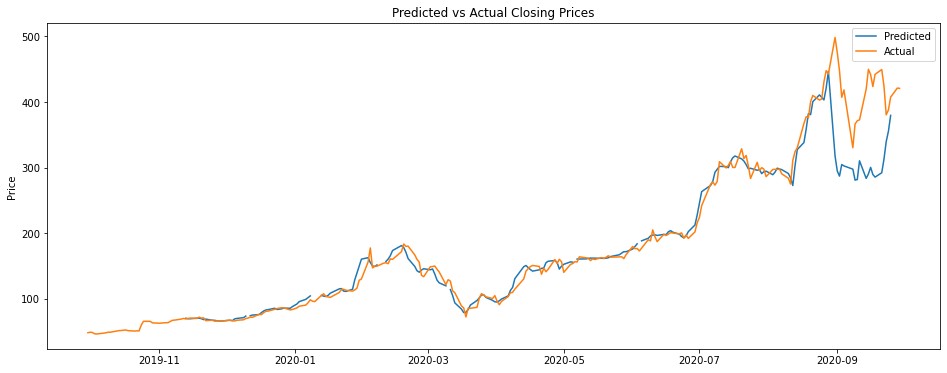

In [7]:
# Transforming the actual values to their original price
actual = pd.DataFrame(close_scaler.inverse_transform(data_frame[["Close"]]), 
                      index=data_frame.index, 
                      columns=[data_frame.columns[0]])

# Getting a DF of the predicted values to validate against
predictions = validator(days_learn, days_predict)

# Printing the RMSE
print("RMSE:", val_rmse(actual, predictions))
    
# Plotting
plt.figure(figsize=(16,6))

# Plotting those predictions
plt.plot(predictions, label='Predicted')

# Plotting the actual values
plt.plot(actual, label='Actual')

plt.title(f"Predicted vs Actual Closing Prices")
plt.ylabel("Price")
plt.legend()
plt.xlim('2018-05', '2020-05')
plt.show()

                 Close
2020-09-30  325.041534
2020-10-01  304.218750
2020-10-02  307.008698
2020-10-05  304.222961
2020-10-06  315.814758
2020-10-07  324.582001
2020-10-08  309.500610
2020-10-09  304.154480
2020-10-12  294.082123
2020-10-13  291.161560
2020-10-14  291.206085
2020-10-15  282.583649
2020-10-16  298.474304
2020-10-19  285.774353
2020-10-20  309.802704
2020-10-21  317.413422
2020-10-22  334.777252
2020-10-23  337.432678
2020-10-26  339.333252
2020-10-27  339.755432


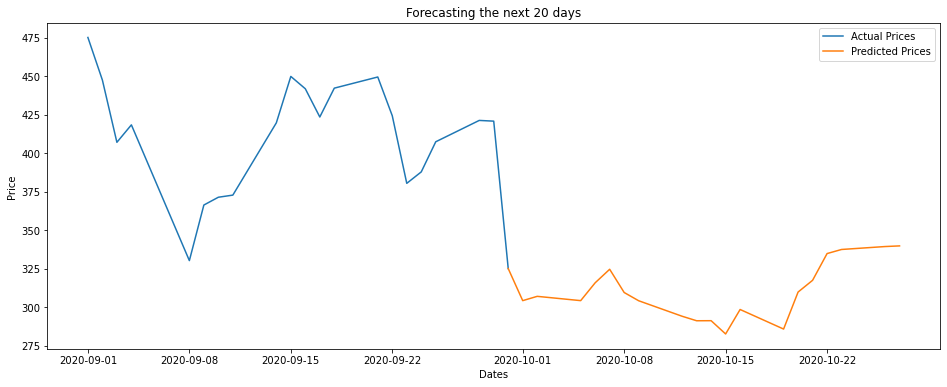

In [8]:
# Predicting off of the most recent days from the original DF
yhat = model.predict(np.array(data_frame.tail(days_learn)).reshape(1, days_learn, features))

# Transforming the predicted values back to their original format
yhat = close_scaler.inverse_transform(yhat)[0]

# Creating a DF of the predicted prices
preds = pd.DataFrame(yhat, 
                     index=pd.date_range(start=data_frame.index[-1]+timedelta(days=1), 
                                         periods=len(yhat), 
                                         freq="B"), 
                     columns=[data_frame.columns[0]])

# Number of periods back to plot the actual values
pers = days_learn

# Transforming the actual values to their original price
actual = pd.DataFrame(close_scaler.inverse_transform(data_frame[["Close"]].tail(pers)), 
                      index=data_frame.Close.tail(pers).index, 
                      columns=[data_frame.columns[0]]).append(preds.head(1))

# Printing the predicted prices
print(preds)

# Plotting
plt.figure(figsize=(16,6))
plt.plot(actual, label="Actual Prices")
plt.plot(preds, label="Predicted Prices")
plt.ylabel("Price")
plt.xlabel("Dates")
plt.title(f"Forecasting the next {len(yhat)} days")
plt.legend()
plt.show()